In [108]:
import pandas as pd
wake_voters1 = pd.read_excel('/Users/michellehand/Library/CloudStorage/OneDrive-WakeTechCommunityCollege/BAS221 Intro to Predictive Analytics/vrdb01.xlsx')
wake_voters2 = pd.read_excel('/Users/michellehand/Library/CloudStorage/OneDrive-WakeTechCommunityCollege/BAS221 Intro to Predictive Analytics/vrdb02_12.xlsx')
wake_voters3 = pd.read_excel('/Users/michellehand/Library/CloudStorage/OneDrive-WakeTechCommunityCollege/BAS221 Intro to Predictive Analytics/vrdb13_20.xlsx')

In [109]:
wake_voters = pd.concat([wake_voters1, wake_voters2, wake_voters3], ignore_index=True)

In [110]:
wake_voters.columns

Index(['county_name', 'ReportDate', 'voter_reg_num', 'status_lbl', 'last_name',
       'first_name', 'middle_name', 'name_suffix_lbl', 'house_num',
       'half_code', 'street_dir_lbl', 'street_name', 'street_type_lbl',
       'street_suffix_lbl', 'unit_designator', 'unit_num_str', 'city', 'state',
       'zip', 'mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4',
       'mail_city', 'mail_state', 'mail_zip', 'race_lbl', 'party_lbl',
       'gender_lbl', 'registration_dt', 'eoy_age', 'precinct_lbl',
       'municipality_lbl', 'ward_lbl', 'congressional_district_lbl',
       'superior_court_lbl', 'judicial_district_lbl', 'nc_senate_lbl',
       'nc_house_lbl', 'county_commissioner_lbl', 'school_lbl',
       'prosecutorial_lbl', 'voting_district_lbl', '05/08/2018', '11/06/2018',
       '10/08/2019', '11/05/2019', '03/03/2020', '11/03/2020', '10/05/2021',
       '11/02/2021', '05/17/2022', '07/26/2022', '11/08/2022', '10/10/2023',
       '11/07/2023', '03/05/2024', '05/14/2024'],
     

In [298]:
wake_voters.head()

,county_name,ReportDate,voter_reg_num,status_lbl,last_name,first_name,middle_name,name_suffix_lbl,house_num,half_code,...,11/03/2020,10/05/2021,11/02/2021,05/17/2022,07/26/2022,11/08/2022,10/10/2023,11/07/2023,03/05/2024,05/14/2024
0,WAKE,2024-10-07,100928943,A,ABERCOMBIE,EWAN,MARTIN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WAKE,2024-10-07,100930052,A,ACOSTA GUASTELLA,NICOLE,NaN,NaN,113,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WAKE,2024-10-07,10165132,A,ADAMS,DOROTA,TULODZIECKA,NaN,308,NaN,...,M,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN
3,WAKE,2024-10-07,27940,A,ADAMS,JEFFERSON,HODGES,NaN,308,NaN,...,M,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN
4,WAKE,2024-10-07,100751700,A,ADAMS,KATHRYN,BLAIR,NaN,2501,NaN,...,M,NaN,NaN,NaN,NaN,O,NaN,NaN,NaN,NaN


Step 3: Filter voters for only active voters and those that registered before the 11/03/2020 election

In [299]:
wake_voters.dtypes

county_name                           object
ReportDate                    datetime64[ns]
voter_reg_num                          int64
status_lbl                            object
last_name                             object
first_name                            object
middle_name                           object
name_suffix_lbl                       object
house_num                              int64
half_code                             object
street_dir_lbl                        object
street_name                           object
street_type_lbl                       object
street_suffix_lbl                     object
unit_designator                      float64
unit_num_str                          object
city                                  object
state                                 object
zip                                    int64
mail_addr1                            object
mail_addr2                            object
mail_addr3                            object
mail_addr4

In [300]:
wake_voters['registration_dt'] = pd.to_datetime(wake_voters['registration_dt'])

In [301]:
active_voters = wake_voters[(wake_voters.status_lbl == 'A') & (wake_voters.registration_dt < '11/03/2020')]

Step 4: Replace any lookup codes with actual values

In [302]:
active_voters

,county_name,ReportDate,voter_reg_num,status_lbl,last_name,first_name,middle_name,name_suffix_lbl,house_num,half_code,...,11/03/2020,10/05/2021,11/02/2021,05/17/2022,07/26/2022,11/08/2022,10/10/2023,11/07/2023,03/05/2024,05/14/2024
2,WAKE,2024-10-07,10165132,A,ADAMS,DOROTA,TULODZIECKA,NaN,308,NaN,...,M,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN
3,WAKE,2024-10-07,27940,A,ADAMS,JEFFERSON,HODGES,NaN,308,NaN,...,M,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN
4,WAKE,2024-10-07,100751700,A,ADAMS,KATHRYN,BLAIR,NaN,2501,NaN,...,M,NaN,NaN,NaN,NaN,O,NaN,NaN,NaN,NaN
6,WAKE,2024-10-07,100569749,A,ADILETTA,LAUREN,ELIZABETH,NaN,401,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,WAKE,2024-10-07,31209633,A,AKRIDGE,SHIRLEY,A,NaN,1100,NaN,...,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850681,WAKE,2024-10-07,100391812,A,ZUBER,THOMAS,JOHN,NaN,103,NaN,...,O,NaN,NaN,NaN,NaN,O,NaN,NaN,NaN,NaN
850682,WAKE,2024-10-07,100416381,A,ZUBER,THOMAS,JOHN,II,103,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850683,WAKE,2024-10-07,100818480,A,ZUGASTI,ALFREDO,NaN,NaN,1365,NaN,...,O,NaN,NaN,V,NaN,O,NaN,V,NaN,NaN
850685,WAKE,2024-10-07,100447367,A,ZYGMOND,BART,STEPHEN,NaN,526,NaN,...,O,NaN,NaN,NaN,NaN,O,NaN,NaN,EV,NaN


In [303]:
active_voters.party_lbl.value_counts()

UNA    227774
DEM    201389
REP    130389
LIB      3402
NLB       784
GRE       128
WTP        24
JFA         6
CST         5
Name: party_lbl, dtype: int64

In [304]:
active_voters.party_lbl.unique()

array(['DEM', 'UNA', 'REP', 'LIB', 'NLB', 'GRE', 'JFA', 'WTP', 'CST'],
      dtype=object)

In [305]:
active_voters.party_lbl.replace(['LIB', 'NLB', 'GRE', 'JFA', 'WTP', 'CST'], 'OTHER', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [306]:
active_voters.party_lbl.unique()

array(['DEM', 'UNA', 'REP', 'OTHER'], dtype=object)

In [307]:
active_voters.party_lbl.replace({'DEM': 'DEMOCRAT', 'REP': 'REPUBLICAN', 'UNA': 'UNAFFILIATED'}, inplace=True)

In [308]:
active_voters.status_lbl.replace(['A'], 'Active', inplace=True)

In [309]:
active_voters.race_lbl.unique()

array(['W', 'B', 'U', 'I', 'O', 'A', 'M', 'P'], dtype=object)

In [310]:
active_voters.race_lbl.value_counts()

W    362598
B    100068
U     49497
O     24503
A     22148
M      3679
I      1378
P        30
Name: race_lbl, dtype: int64

In [311]:
active_voters.race_lbl.replace(['U', 'O', 'M', 'I', 'P'], 'OTHER', inplace=True)

In [312]:
active_voters.race_lbl.replace({'W': 'White', 'B': 'Black', 'A': 'Asian'}, inplace=True)

In [313]:
active_voters.gender_lbl.unique()

array(['F', 'M', 'U'], dtype=object)

In [314]:
active_voters.gender_lbl.replace({'F': 'FEMALE', 'M': 'MALE', 'U': 'UKNOWN'}, inplace=True)

In [315]:
active_voters.congressional_district_lbl.unique()

array([ 2, 13,  4])

Step 6: Drop all the other vote dates

In [316]:
active_voters.drop(columns=['05/08/2018', '11/06/2018','10/08/2019', '11/05/2019', '03/03/2020','10/05/2021', '11/02/2021', '05/17/2022', '07/26/2022', '11/08/2022', '10/10/2023', '11/07/2023', '03/05/2024', '05/14/2024'], inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Step 7: Turn the 2020 election date into a binary variable

In [317]:
active_voters['11/03/2020'].unique()

array(['M', 'O', nan, 'V', 'P'], dtype=object)

In [318]:
active_voters['11/03/2020'].replace(['M', 'O', 'V', 'P'], '1', inplace=True)
active_voters['11/03/2020'].fillna('0', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [319]:
active_voters['11/03/2020'].value_counts()

1    516640
0     47261
Name: 11/03/2020, dtype: int64

Step 8: Find me in the voter dataset!

In [320]:
find_me = active_voters[(active_voters.last_name == 'HAND') & (active_voters.first_name == 'MICHELLE')]
find_me

,county_name,ReportDate,voter_reg_num,status_lbl,last_name,first_name,middle_name,name_suffix_lbl,house_num,half_code,...,congressional_district_lbl,superior_court_lbl,judicial_district_lbl,nc_senate_lbl,nc_house_lbl,county_commissioner_lbl,school_lbl,prosecutorial_lbl,voting_district_lbl,11/03/2020
680219,WAKE,2024-10-07,100789939,Active,HAND,MICHELLE,THERESE,NaN,1131,NaN,...,2,10A,10E,16,33,4,5,10,18-06,1


Step 9: Drop columns that provide little predictive value

In [321]:
active_voters.columns

Index(['county_name', 'ReportDate', 'voter_reg_num', 'status_lbl', 'last_name',
       'first_name', 'middle_name', 'name_suffix_lbl', 'house_num',
       'half_code', 'street_dir_lbl', 'street_name', 'street_type_lbl',
       'street_suffix_lbl', 'unit_designator', 'unit_num_str', 'city', 'state',
       'zip', 'mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4',
       'mail_city', 'mail_state', 'mail_zip', 'race_lbl', 'party_lbl',
       'gender_lbl', 'registration_dt', 'eoy_age', 'precinct_lbl',
       'municipality_lbl', 'ward_lbl', 'congressional_district_lbl',
       'superior_court_lbl', 'judicial_district_lbl', 'nc_senate_lbl',
       'nc_house_lbl', 'county_commissioner_lbl', 'school_lbl',
       'prosecutorial_lbl', 'voting_district_lbl', '11/03/2020'],
      dtype='object')

In [322]:
active_voters_2020 = active_voters.drop(columns= ['county_name','last_name',
       'first_name', 'middle_name', 'name_suffix_lbl', 'house_num',
       'half_code', 'street_dir_lbl', 'street_name', 'street_type_lbl',
       'street_suffix_lbl', 'unit_designator', 'unit_num_str','mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4',
       'mail_city', 'mail_state', 'mail_zip', 'precinct_lbl',
       'municipality_lbl', 'ward_lbl','superior_court_lbl', 'judicial_district_lbl','county_commissioner_lbl', 'school_lbl',
       'prosecutorial_lbl', 'voting_district_lbl', 'zip', 'state', 'nc_senate_lbl','nc_house_lbl', 'congressional_district_lbl'])

Step 10: Review null values and provide missing values.

In [323]:
active_voters_2020.isnull().sum()

ReportDate         0
voter_reg_num      0
status_lbl         0
city               0
race_lbl           0
party_lbl          0
gender_lbl         0
registration_dt    0
eoy_age            0
11/03/2020         0
dtype: int64

In [324]:
active_voters_2020.dtypes

ReportDate         datetime64[ns]
voter_reg_num               int64
status_lbl                 object
city                       object
race_lbl                   object
party_lbl                  object
gender_lbl                 object
registration_dt    datetime64[ns]
eoy_age                     int64
11/03/2020                 object
dtype: object

Step 11. Create new variable that determines the number of years since voter registered. Using report date to subtract from registration date.

In [325]:
import numpy as np
active_voters_2020['years_reg'] = (active_voters_2020['ReportDate'] - active_voters_2020['registration_dt'])/np.timedelta64(1,'Y')

Step 12: Review categorical variables for city and combine less frequent cities into "OTHER."

In [326]:
active_voters_2020.city.value_counts()

RALEIGH          267992
CARY              80651
APEX              45149
WAKE FOREST       40410
FUQUAY VARINA     27372
HOLLY SPRINGS     23118
GARNER            18788
KNIGHTDALE        16009
WENDELL           10989
MORRISVILLE       10733
ZEBULON            8603
WILLOW SPRING      5542
ROLESVILLE         4941
NEW HILL           1873
CLAYTON             512
ANGIER              417
YOUNGSVILLE         352
CREEDMOOR           260
DURHAM              190
Name: city, dtype: int64

In [327]:
active_voters_2020.city.unique()

array(['RALEIGH', 'GARNER', 'WAKE FOREST', 'APEX', 'NEW HILL',
       'HOLLY SPRINGS', 'CARY', 'MORRISVILLE', 'FUQUAY VARINA', 'DURHAM',
       'YOUNGSVILLE', 'ZEBULON', 'WENDELL', 'KNIGHTDALE', 'WILLOW SPRING',
       'ANGIER', 'CREEDMOOR', 'CLAYTON', 'ROLESVILLE'], dtype=object)

In [328]:
active_voters_2020.city.replace(['DURHAM','YOUNGSVILLE', 'ZEBULON','CLAYTON', 'ROLESVILLE', 'DURHAM', 'NEW HILL', 'ANGIER', 'WILLOW SPRING', 'HOLLY SPRINGS', 'FUQUAY VARINA', 'GARNER', 'KNIGHTDALE', 'WENDELL', 'MORRISVILLE'], 'OTHER', inplace=True)

Step 13: Drop report date and registration date as they are no longer needed.

In [329]:
active_voters_2020.drop(columns=['ReportDate','status_lbl', 'registration_dt', 'voter_reg_num'], inplace=True)

In [330]:
active_voters_2020.dtypes

city           object
race_lbl       object
party_lbl      object
gender_lbl     object
eoy_age         int64
11/03/2020     object
years_reg     float64
dtype: object

Step 14: Rename election Date to a Yes/No (1/0) response variable

In [331]:
active_voters_2020['11/03/2020'] = active_voters_2020['11/03/2020'].astype('int64')
active_voters_2020.rename(columns={'11/03/2020': 'DidVote'}, inplace=True)

Step15: Describe descriptive statistics of numeric variables

In [332]:
active_voters_2020.eoy_age.describe()

count    563901.000000
mean         51.167161
std          17.056193
min          21.000000
25%          37.000000
50%          51.000000
75%          64.000000
max         107.000000
Name: eoy_age, dtype: float64

In [333]:
active_voters_2020.years_reg.describe()

count    563901.000000
mean         16.848909
std          12.296316
min           3.928897
25%           7.088441
50%          12.755909
75%          23.984065
max          72.768092
Name: years_reg, dtype: float64

Step 16: Get dummies for categorical variables in dataset

In [334]:
predict_data = pd.get_dummies(active_voters_2020)

In [335]:
predict_data.reset_index(inplace=True)

In [337]:
predict_data.drop(columns=['index'], inplace=True)
predict_data

,eoy_age,DidVote,years_reg,city_APEX,city_CARY,city_CREEDMOOR,city_OTHER,city_RALEIGH,city_WAKE FOREST,race_lbl_Asian,race_lbl_Black,race_lbl_OTHER,race_lbl_White,party_lbl_DEMOCRAT,party_lbl_OTHER,party_lbl_REPUBLICAN,party_lbl_UNAFFILIATED,gender_lbl_FEMALE,gender_lbl_MALE,gender_lbl_UKNOWN
0,67,1,33.766607,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
1,68,1,50.766272,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
2,44,1,4.498381,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
3,26,1,7.236288,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
4,78,1,21.070932,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563896,68,1,9.993361,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
563897,27,1,9.328049,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
563898,53,1,3.942586,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
563899,56,1,8.736661,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


Step 17: Import models and train dataset

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
feature_cols = predict_data.drop('DidVote', axis=1).columns
x = predict_data[feature_cols]
y = predict_data.DidVote
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [340]:
x_train

,eoy_age,years_reg,city_APEX,city_CARY,city_CREEDMOOR,city_OTHER,city_RALEIGH,city_WAKE FOREST,race_lbl_Asian,race_lbl_Black,race_lbl_OTHER,race_lbl_White,party_lbl_DEMOCRAT,party_lbl_OTHER,party_lbl_REPUBLICAN,party_lbl_UNAFFILIATED,gender_lbl_FEMALE,gender_lbl_MALE,gender_lbl_UKNOWN
68056,65,28.468757,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
215782,73,29.974606,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
415451,57,12.068694,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
450768,52,12.169997,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
155453,70,17.007878,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517173,44,24.433082,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
522741,80,8.520367,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
308997,84,8.016592,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
293152,34,7.980999,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


Step 18: Create the decision tree model #1

              precision    recall  f1-score   support

           0       0.16      0.68      0.26     14278
           1       0.96      0.68      0.79    154893

    accuracy                           0.68    169171
   macro avg       0.56      0.68      0.53    169171
weighted avg       0.89      0.68      0.75    169171



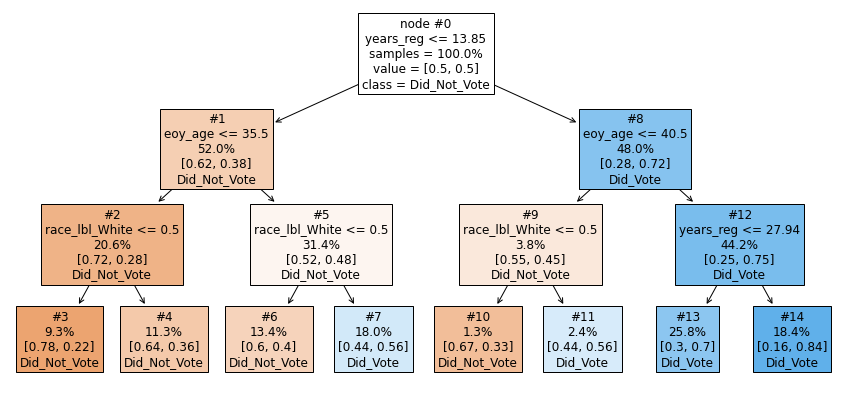

In [342]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics

def run_model(d=3, cw='balanced', c='gini', s='best', msl=1):
    clf = tree.DecisionTreeClassifier(max_depth=d,
                                      class_weight=cw,
                                      criterion=c,
                                      splitter=s,
                                      min_samples_leaf=msl)
    clf2 = clf.fit(x_train, y_train)
    plt.figure(figsize=(15,7))
    tree.plot_tree(clf2, 
               feature_names=feature_cols,
               class_names = ['Did_Not_Vote', 'Did_Vote'],
               filled=True, precision=2,
               node_ids=True, fontsize=12,
               label='root', proportion=True,
               impurity=False)
    y_pred = clf2.predict(x_test)
    print(metrics.classification_report(y_test, y_pred))

run_model()

Create tree #2

              precision    recall  f1-score   support

           0       0.15      0.77      0.25     14278
           1       0.97      0.59      0.73    154893

    accuracy                           0.61    169171
   macro avg       0.56      0.68      0.49    169171
weighted avg       0.90      0.61      0.69    169171



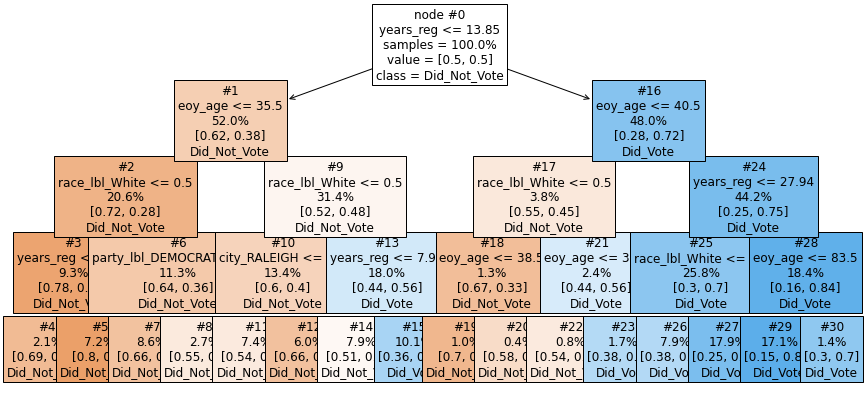

In [345]:
run_model(d=4, cw='balanced', c='gini', s='best', msl=1)

Create tree #3

              precision    recall  f1-score   support

           0       0.14      0.76      0.23     14278
           1       0.96      0.56      0.71    154893

    accuracy                           0.58    169171
   macro avg       0.55      0.66      0.47    169171
weighted avg       0.89      0.58      0.67    169171



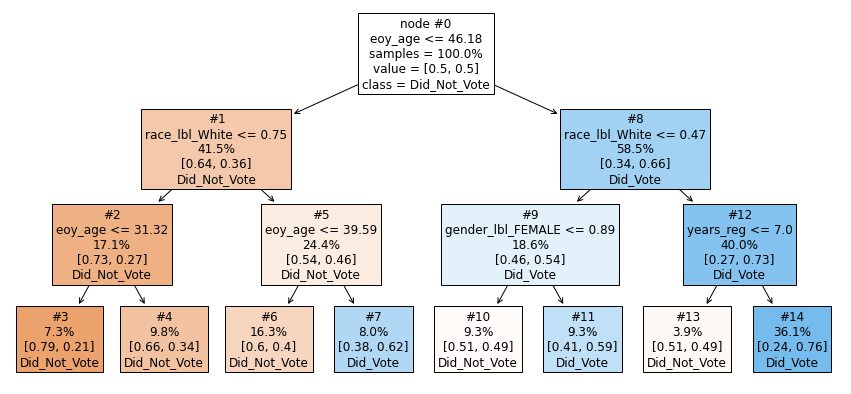

In [344]:
run_model(d=3, cw='balanced', c='gini', s='random', msl=1)

##Evaluate
The first model I ran looks like the one with the best f-1 score, that initiates the best split for 3 levels deep. The first model predicts that if an individual was registered for 28 years and was older than 40.5, they had voted (which was 44% of the sample). If an individual had been registered for less than 14 years, were under the age of 35.5, and were not white, there was a much higher likelihood that they did not vote. It looks like age and years registered are highly correlated with the probabilty to vote.